

# Project: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I will analyze TMDB Movie Data which contains about 1000 movies, this data is originally from Kaggle. 
> I would be cleaning and investigating the data to draw conclusions on the questions listed below: 
>
> <ol>
   <li> Which movies have the highest and lowest budget?
   <li> What is the average budget per year?
   <li> Which movies have the highest and lowest revenue?
   <li> What is the average revenue per year?
   <li> What is the most and least popular movie?
   <li> Do movies with higher budget gain more popularity?
   <li> Do movies with higher popularity gain more profit?
   <li> Do movies with higher popularity gain more votes?
   <li> Which actor has starred in the most movies?
   <li> What is top acted genre of movie?
   <li> Which genres are most popular from year to year?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, the data is inspected to understand its structure and properties. Here I'll decide if useful changes are to be made to the dataframe.

### General Properties

In [2]:
df_tmdb = pd.read_csv('tmdb-movies.csv')
df_tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>This provides the first 10 rows of the dataframe. We can see unique details for each column below.

In [3]:
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> This displays a concise summary of the dataframe. The dataframe has 10866 rows and 21 columns. That means we have a total
> of 10866 movies and 21 attributes to describe them.
>
> The data type is consistent with the data so futher chane would be made.
>
> Some of the rows are empty, this includes the imdb_id, cast, homepage, director, tagline, keywords, overview, genre and production companies. 

In [4]:
sum(df_tmdb.duplicated())

1

> The dataframe has one duplicate value

## Data Cleaning 

> In this section, the data is cleaned, I'll be fixing the issues relating missing data and duplicate values

In [5]:
# This shows the duplicate row
print(df_tmdb[df_tmdb.duplicated()])

         id    imdb_id  popularity    budget  revenue original_title  \
2090  42194  tt0411951     0.59643  30000000   967000         TEKKEN   

                                                   cast homepage  \
2090  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...      NaN   

              director              tagline  ...  \
2090  Dwight H. Little  Survival is no game  ...   

                                               overview runtime  \
2090  In the year of 2039, after World Wars destroy ...      92   

                                           genres    production_companies  \
2090  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date vote_count  vote_average  release_year  budget_adj  \
2090      3/20/10        110           5.0          2010  30000000.0   

      revenue_adj  
2090     967000.0  

[1 rows x 21 columns]


In [6]:
# This deletes the duplicate row
df_tmdb.drop_duplicates(inplace=True)

In [7]:
#This confirms that the number of duplicate value
sum(df_tmdb.duplicated())

0

> The duplicate value has been deleted, next I'll drop columns that are not useful to this analysis

In [8]:
#This drops columns that we would not be using for this analysis
df_tmdb.drop(['id','imdb_id', 'homepage', 'tagline', 'keywords', 'overview','release_date', 'budget_adj', 'revenue_adj'], axis =1, inplace=True)

>There are still rows with missing data, since these rows (cast, director and genre) are of string data type, I would drop the rows.

In [9]:
#This drops rows with missing data
df_tmdb.dropna(inplace=True)

In [10]:
df_tmdb = df_tmdb.reset_index()
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9772 entries, 0 to 9771
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 9772 non-null   int64  
 1   popularity            9772 non-null   float64
 2   budget                9772 non-null   int64  
 3   revenue               9772 non-null   int64  
 4   original_title        9772 non-null   object 
 5   cast                  9772 non-null   object 
 6   director              9772 non-null   object 
 7   runtime               9772 non-null   int64  
 8   genres                9772 non-null   object 
 9   production_companies  9772 non-null   object 
 10  vote_count            9772 non-null   int64  
 11  vote_average          9772 non-null   float64
 12  release_year          9772 non-null   int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 992.6+ KB


>The dataframe now has 13 columns and 9772 rows

In [11]:
#this returns useful descriptive statistics for each column
df_tmdb.describe()

,index,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9772.000000,9772.000000,9.772000e+03,9.772000e+03,9772.000000,9772.000000,9772.000000,9772.000000
mean,5479.880884,0.694721,1.617967e+07,4.423121e+07,102.926627,239.312014,5.963528,2000.878428
std,3169.232297,1.036931,3.221074e+07,1.225889e+08,27.877432,603.011504,0.913174,13.036794
min,0.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,2722.750000,0.232710,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000
50%,5497.500000,0.419762,2.000000e+05,0.000000e+00,100.000000,46.000000,6.000000,2005.000000
75%,8260.250000,0.776408,1.928750e+07,3.104729e+07,112.000000,173.000000,6.600000,2011.000000
max,10865.000000,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis



### 1. Which movies have the highest and lowest budget?

In [45]:
def cal(column):
    #for highest value
    h= df_tmdb[column].idxmax()
    high=pd.DataFrame(df_tmdb.loc[h])
    
    #for lowest value
    l= df_tmdb[column].idxmin()
    low=pd.DataFrame(df_tmdb.loc[l])
    
    
    hl=pd.concat([high, low], axis=1)
    
    return hl

In [46]:
cal('budget')

,2032,30
index,2244,30
popularity,0.25054,3.927333
budget,425000000,0
revenue,11087569,29355203
original_title,The Warrior's Way,Mr. Holmes
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Ian McKellen|Milo Parker|Laura Linney|Hattie M...
director,Sngmoo Lee,Bill Condon
runtime,100,103
genres,Adventure|Fantasy|Action|Western|Thriller,Mystery|Drama
production_companies,Boram Entertainment Inc.,BBC Films|See-Saw Films|FilmNation Entertainme...


> **Warrior game** has the highest budget of **425000000** and was released in the year **2010**
>
> **Mr Holmes** has the lowest budget of **0** and was released in the year **2015**

### 2. What is the average budget per year?

In [14]:
df_bud = df_tmdb.groupby(['release_year'],as_index=False)['budget'].mean()
df_bud.sort_values('budget', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

,release_year,budget
40,2000,2.926633e+07
44,2004,2.794897e+07
39,1999,2.710017e+07
41,2001,2.650485e+07
37,1997,2.639493e+07
43,2003,2.451125e+07
42,2002,2.418108e+07
38,1998,2.352440e+07
45,2005,2.258292e+07
50,2010,2.221868e+07


> The table above shows the mean budget per year, sorted in descending order with respect to the budget.
>
> Below is a bar chart that clearly shows the average budget per year

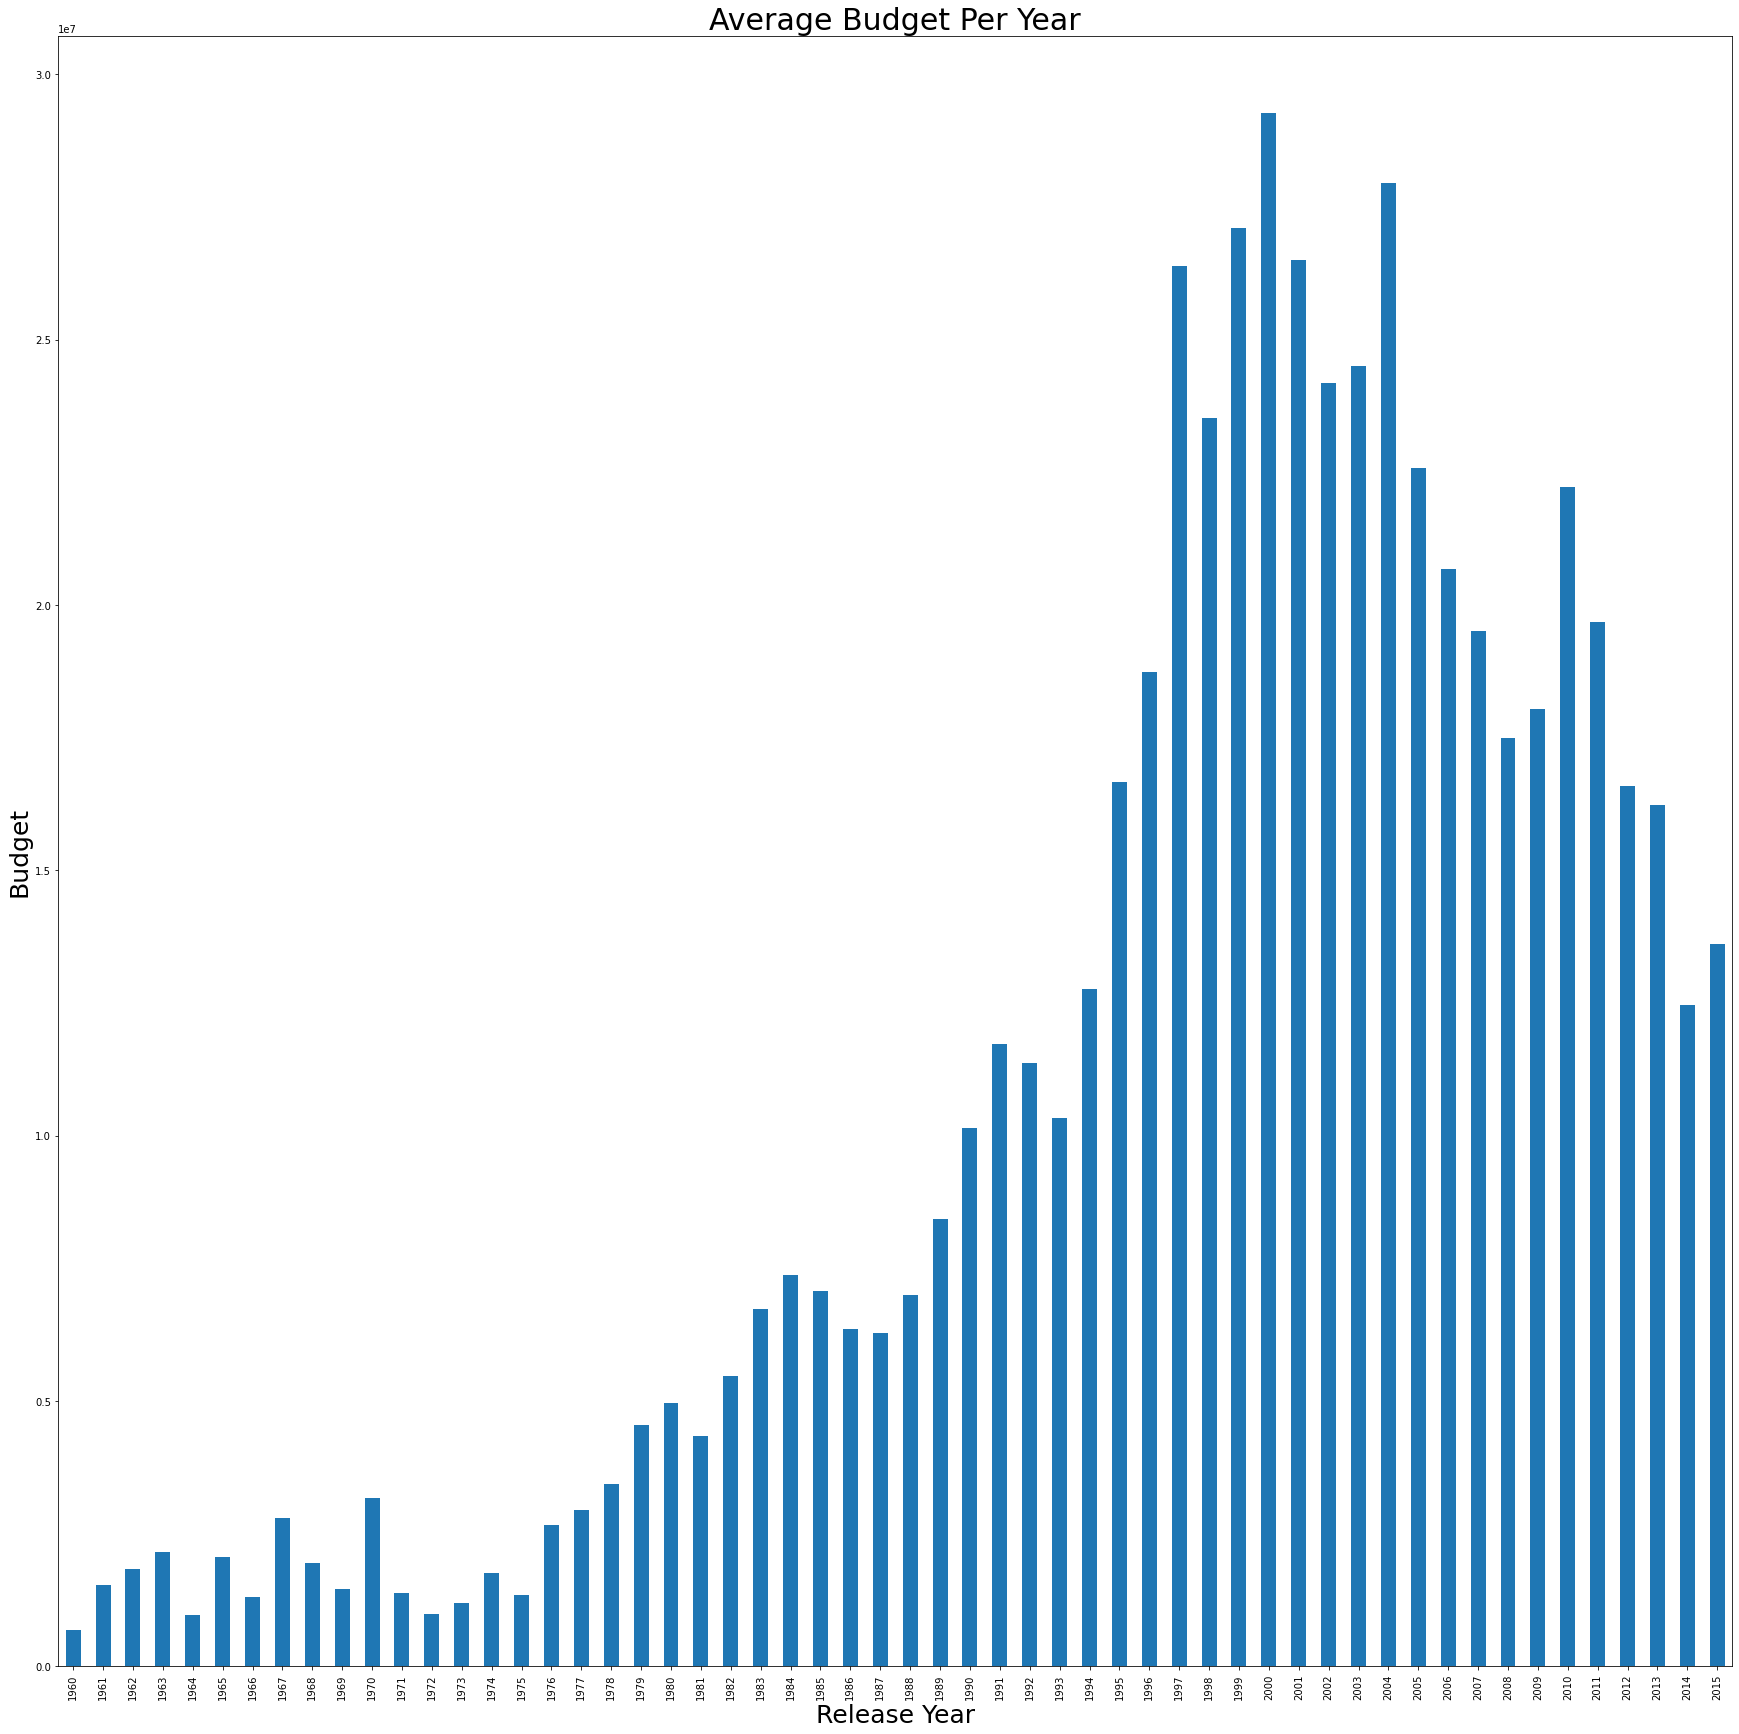

In [15]:
df_tmdb.groupby('release_year')['budget'].mean().plot(kind='bar', figsize=(30,30));
plt.title('Average Budget Per Year', fontsize=30)
plt.xlabel('Release Year', fontsize=25)
plt.ylabel('Budget', fontsize=25);

### 3. Which movie has the highest and lowest revenue? 

In [16]:
cal('revenue')

,1248,48
index,1386,48
popularity,9.432768,2.93234
budget,237000000,30000000
revenue,2781505847,0
original_title,Avatar,Wild Card
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Jason Statham|Michael Angarano|Milo Ventimigli...
director,James Cameron,Simon West
runtime,162,92
genres,Action|Adventure|Fantasy|Science Fiction,Thriller|Crime|Drama
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Current Entertainment|Lionsgate|Sierra / Affin...


> **Avatar** has the highest revenue of **2781505847** and was released in the year **2009**
>
> **Wild Card** has the lowest revenue of **0** and was released in the year **2015**

### 4. What is the average revenue per year?

In [17]:
df_bud = df_tmdb.groupby(['release_year'],as_index=False)['revenue'].mean()
df_bud.sort_values('revenue', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

,release_year,revenue
44,2004,6.619554e+07
41,2001,6.301777e+07
42,2002,6.064831e+07
43,2003,5.956347e+07
37,1997,5.919389e+07
40,2000,5.570929e+07
35,1995,5.380743e+07
39,1999,5.356468e+07
50,2010,5.227538e+07
51,2011,5.194895e+07


> The table above shows the mean revenue per year, sorted in descending order with respect to the revenue.
>
> Below is a bar chart that clearly shows the average revenue per year

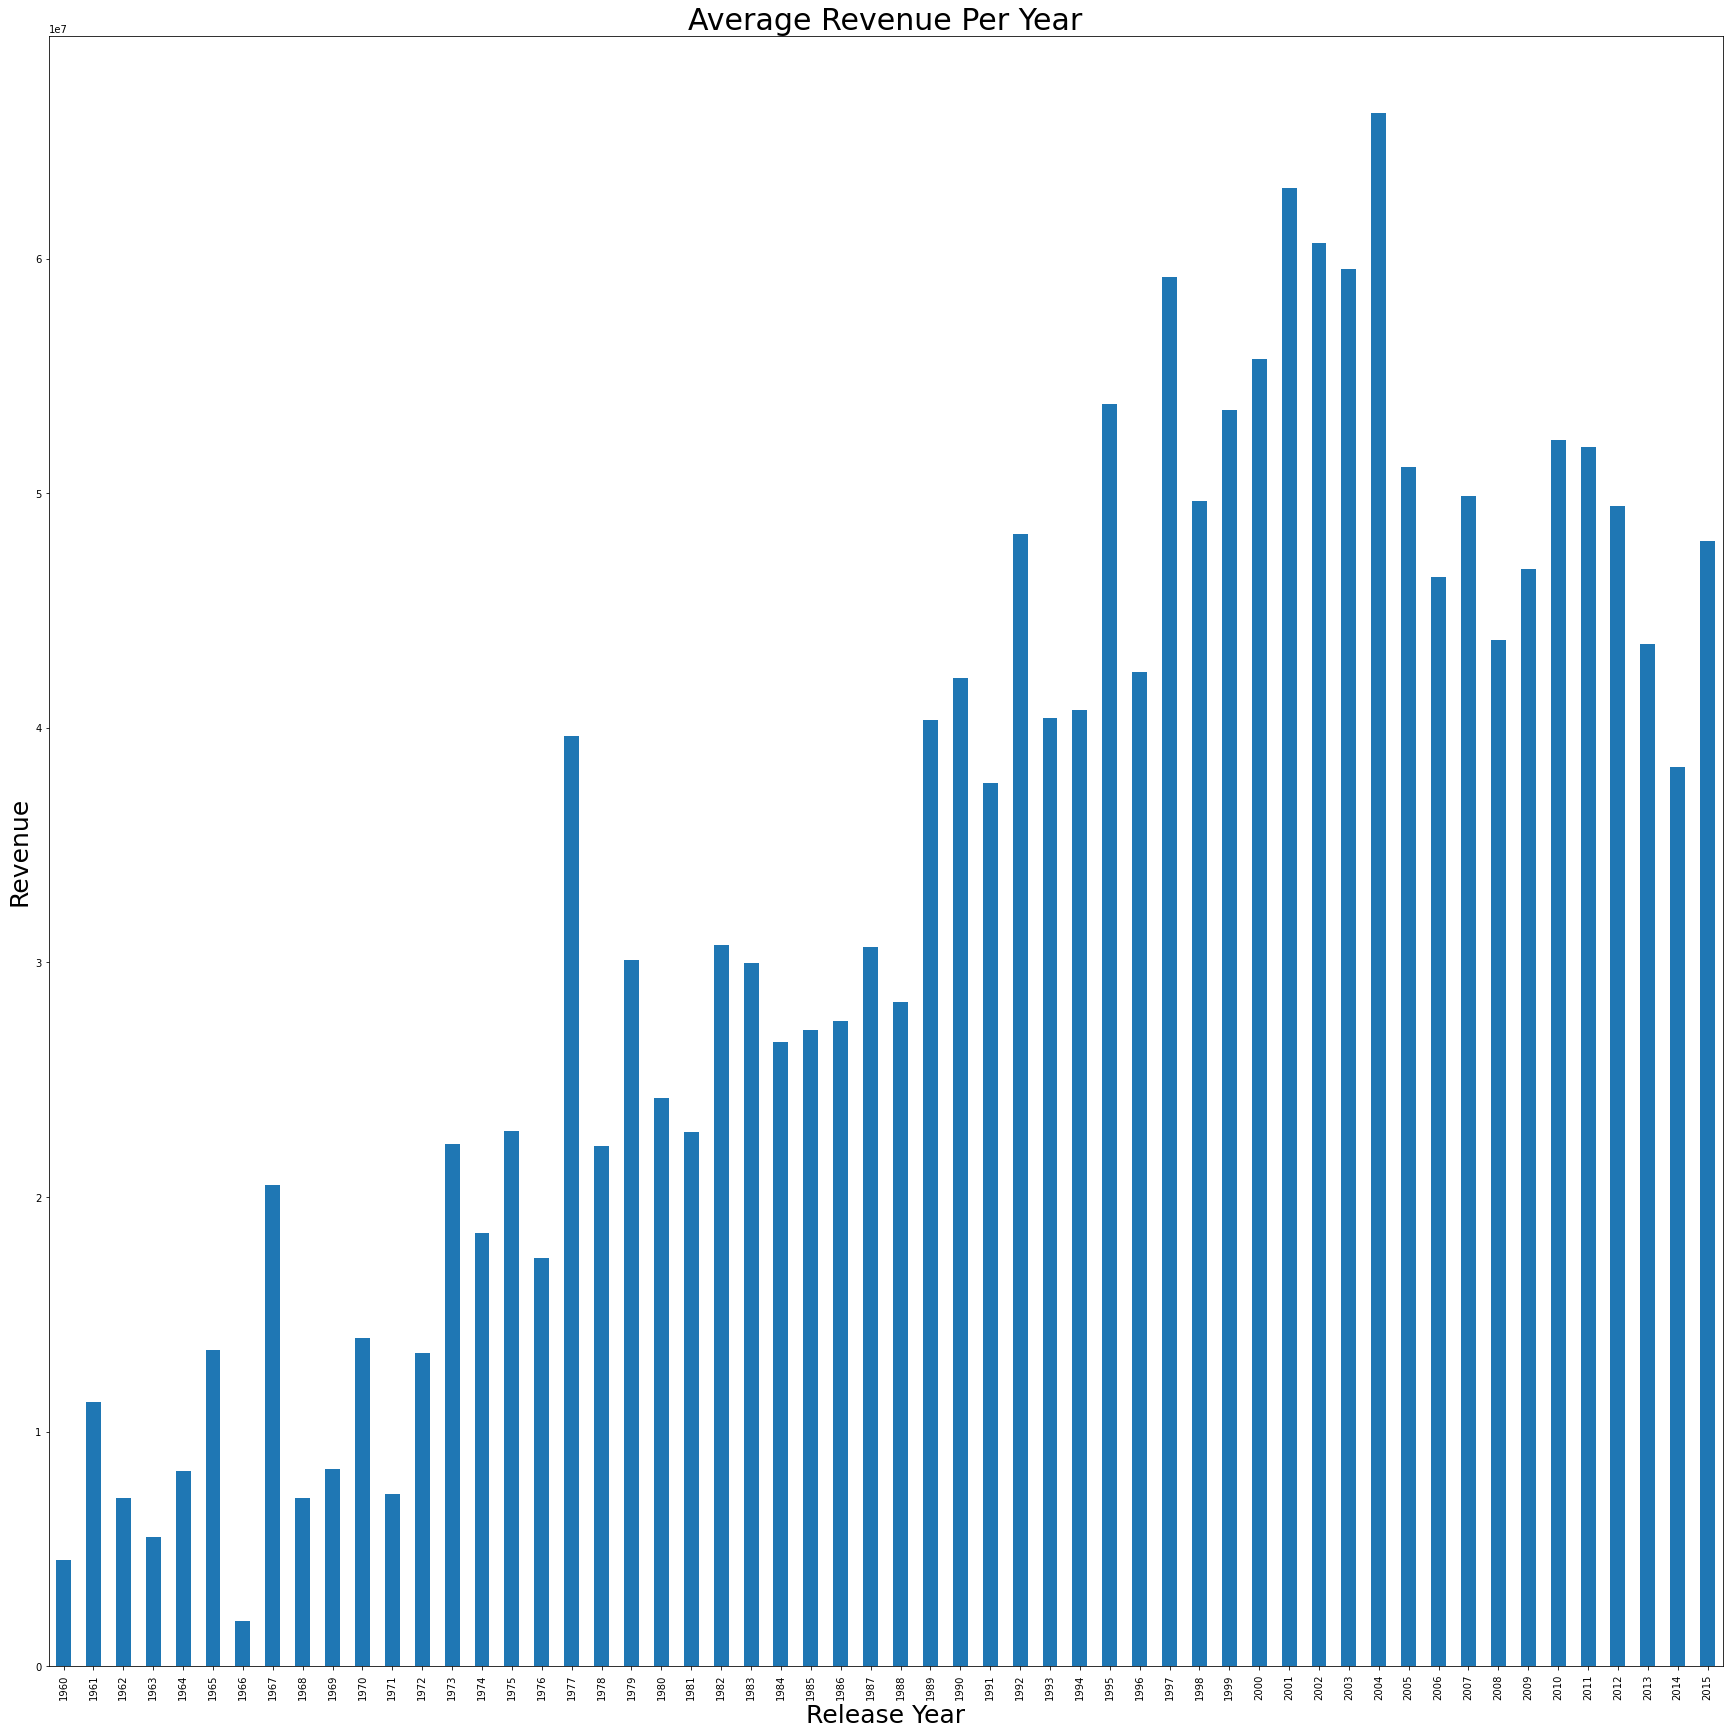

In [18]:
df_tmdb.groupby(['release_year'])['revenue'].mean().plot(kind="bar", figsize=(30,30));
plt.title('Average Revenue Per Year', fontsize=30)
plt.xlabel('Release Year', fontsize=25)
plt.ylabel('Revenue', fontsize=25)
plt.show()

### 5. What is the most  and least popular movie?

In [20]:
cal('popularity')

,0,8923
index,0,9977
popularity,32.985763,0.000188
budget,150000000,0
revenue,1513528810,0
original_title,Jurassic World,The Hospital
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,George C. Scott|Diana Rigg|Richard Dysart|Barn...
director,Colin Trevorrow,Arthur Hiller
runtime,124,103
genres,Action|Adventure|Science Fiction|Thriller,Mystery|Comedy|Drama
production_companies,Universal Studios|Amblin Entertainment|Legenda...,Simcha Productions


>**Jurassic World** is the most popular movie and was released in the year **2015**
>
>**The Hospital** is the least popular movie and was released in the year **1971**

### 6. Do movies with higher budget gain more popularity?

In [21]:
df_pop = df_tmdb.groupby(['original_title','popularity'],as_index=False)['budget'].mean()
df_pop.sort_values('budget', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

,original_title,popularity,budget
8830,The Warrior's Way,0.250540,425000000.0
5671,Pirates of the Caribbean: On Stranger Tides,4.955130,380000000.0
5669,Pirates of the Caribbean: At World's End,4.965391,300000000.0
757,Avengers: Age of Ultron,5.944927,280000000.0
6945,Superman Returns,1.957331,270000000.0
...,...,...,...
4320,LadyBugs,0.049061,0.0
4318,Lady and the Tramp II: Scamp's Adventure,0.993311,0.0
4316,Lady Gaga - Presents The Monster Ball Tour at ...,0.107454,0.0
4315,Lady Chatterley's Lover,0.265010,0.0


> The table above shows the first 5 movies with the highest budget and least 5 movies with lowest budget.
>
>The scatter plot below shows the relationship between budget and poppularity

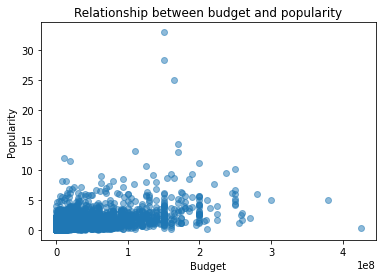

In [22]:
# x-axis
plt.xlabel('Budget')
# y-axis
plt.ylabel('Popularity')
plt.title('Relationship between budget and popularity')
plt.scatter(df_tmdb['budget'], df_tmdb['popularity'], alpha=0.5)
plt.show()

### 7. Do movies with higher popularity gain more profit?

In [23]:
# profit is calcuated as the difference between revenue and budget
df_tmdb['profit'] = df_tmdb['revenue'] - df_tmdb['budget']
# Lets look at the new dataset
df_tmdb.head()

,index,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,profit
0,0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1363528810
1,1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,228436354
2,2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,185238201
3,3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1868178225
4,4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1316249360


In [24]:
df_profit = df_tmdb.groupby(['original_title','popularity','vote_count'],as_index=False)['profit'].mean()
df_profit.sort_values('profit', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

,original_title,popularity,vote_count,profit
755,Avatar,9.432768,8458,2.544506e+09
6778,Star Wars: The Force Awakens,11.173104,5292,1.868178e+09
9005,Titanic,4.355219,4654,1.645034e+09
4099,Jurassic World,32.985763,5562,1.363529e+09
2983,Furious 7,9.335014,2947,1.316249e+09
...,...,...,...,...
7164,The Alamo,0.948560,60,-1.191800e+08
8343,The Pacific,0.757082,183,-1.200000e+08
8878,The Wolfman,0.642475,299,-1.500000e+08
8110,The Lone Ranger,1.214510,1607,-1.657101e+08


> The table above shows the 5 most profitable movies and 5 least profitable movies.
>
>The scatter plot below shows the relationship between profit and popularity

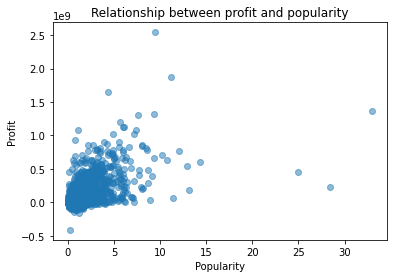

In [25]:
# x-axis
plt.xlabel('Popularity')
# y-axis
plt.ylabel('Profit')
plt.title('Relationship between profit and popularity')
plt.scatter(df_tmdb['popularity'], df_tmdb['profit'], alpha=0.5)
plt.show()

### 8. Do movies with higher popularity gain more votes?

In [26]:
df_rev = df_tmdb.groupby(['original_title','vote_count'],as_index=False)['popularity'].mean()
df_rev.sort_values('popularity', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

,original_title,vote_count,popularity
4098,Jurassic World,5562,32.985763
4671,Mad Max: Fury Road,6185,28.419936
3860,Interstellar,6498,24.949134
3229,Guardians of the Galaxy,5612,14.311205
3853,Insurgent,2480,13.112507
...,...,...,...
2970,Fuera de carta,13,0.001317
4158,Khosla Ka Ghosla!,10,0.001115
4997,Mon petit doigt m'a dit...,13,0.000973
2993,G.B.F.,82,0.000620


> The table above shows top 5 movies with the highest votes and least 5 movies with lowest votes.
>
>The scatter plot below shows the relationship between vote and popularity

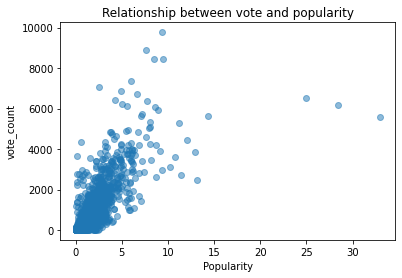

In [27]:
# x-axis
plt.xlabel('Popularity')
# y-axis
plt.ylabel('vote_count')
# Title of the histogram
plt.title('Relationship between vote and popularity')
plt.scatter(df_tmdb['popularity'], df_tmdb['vote_count'], alpha=0.5)
plt.show()

### 9. Which actor has starred in the most movies?

In [28]:
cast_count = pd.Series(df_tmdb['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
cast_count.head(20)

Robert De Niro        72
Samuel L. Jackson     70
Bruce Willis          62
Nicolas Cage          61
Michael Caine         52
Robin Williams        51
Morgan Freeman        49
John Goodman          48
John Cusack           48
Liam Neeson           47
Susan Sarandon        47
Alec Baldwin          47
Tom Hanks             46
Julianne Moore        46
Gene Hackman          45
Dennis Quaid          45
Sylvester Stallone    44
Meryl Streep          44
Willem Dafoe          44
Clint Eastwood        43
dtype: int64

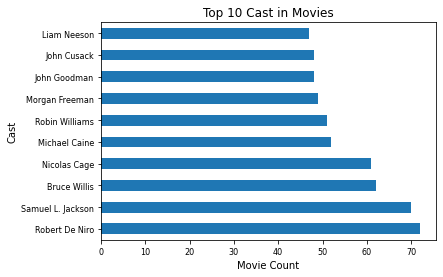

In [29]:
diagram = cast_count.head(10).plot.barh(fontsize = 8)
diagram.set(title = 'Top 10 Cast in Movies')
diagram.set_xlabel('Movie Count')
diagram.set_ylabel('Cast')
plt.show()

>Robert De Niro is the most starred actor in movies starring in 72 movies

### 10. What is top acted genre of movie?

In [30]:
genres_count = pd.Series(df_tmdb['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genres_count.head(10)

Drama              4364
Comedy             3433
Thriller           2746
Action             2235
Romance            1570
Horror             1526
Adventure          1384
Crime              1299
Science Fiction    1136
Family             1095
dtype: int64

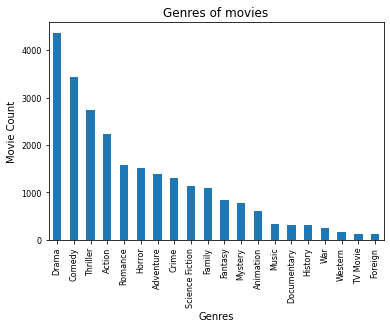

In [31]:
diagram = genres_count.plot.bar(fontsize = 8)
diagram.set(title = 'Genres of movies')
diagram.set_xlabel('Genres')
diagram.set_ylabel('Movie Count')
plt.show()

> Drama is the highest genre of movie with a count of 4364

### 11. Which genres are most popular from year to year?

In [32]:
#Create a new dataframe
df_genres = df_tmdb[['release_year', 'genres', 'popularity']]
df_genres.head()

,release_year,genres,popularity
0,2015,Action|Adventure|Science Fiction|Thriller,32.985763
1,2015,Action|Adventure|Science Fiction|Thriller,28.419936
2,2015,Adventure|Science Fiction|Thriller,13.112507
3,2015,Action|Adventure|Science Fiction|Fantasy,11.173104
4,2015,Action|Crime|Thriller,9.335014


In [33]:
# This would split rows with more than one genre into seperate rows

from itertools import chain

def chainer(s):
    return list(chain.from_iterable(s.str.split('|')))

lens = df_genres['genres'].str.split('|').map(len)

# Create new dataframe, repeating as appropriate
df_genres = pd.DataFrame({'release_year': np.repeat(df_genres['release_year'], lens),                       
                          'genres': chainer(df_genres['genres']),
                          'popularity': np.repeat(df_genres['popularity'], lens)})

df_genres.head()

,release_year,genres,popularity
0,2015,Action,32.985763
0,2015,Adventure,32.985763
0,2015,Science Fiction,32.985763
0,2015,Thriller,32.985763
1,2015,Action,28.419936


In [34]:
def func(group):
    return group.loc[group['popularity'] == group['popularity'].max()]

#Calculate the mean popularity for each genre in each year
df_pop = df_genres.groupby(['release_year', 'genres'], as_index=False).mean()

# Select the most popular genre for each year
df_most_pop = df_pop.groupby('release_year', as_index=False).apply(func).reset_index(drop=True)
df_most_pop.head()

,release_year,genres,popularity
0,1960,Thriller,0.811910
1,1961,Animation,2.631987
2,1962,Adventure,0.942513
3,1963,Animation,2.180410
4,1964,War,0.930959


### This shows the number of times a genre had the highest popularity

In [35]:
df_most_pop.groupby('genres')['release_year'].count()


genres
Action              1
Adventure          11
Animation          13
Crime               5
Family              3
Fantasy             9
History             1
Music               2
Mystery             2
Science Fiction     4
Thriller            1
War                 4
Western             1
Name: release_year, dtype: int64

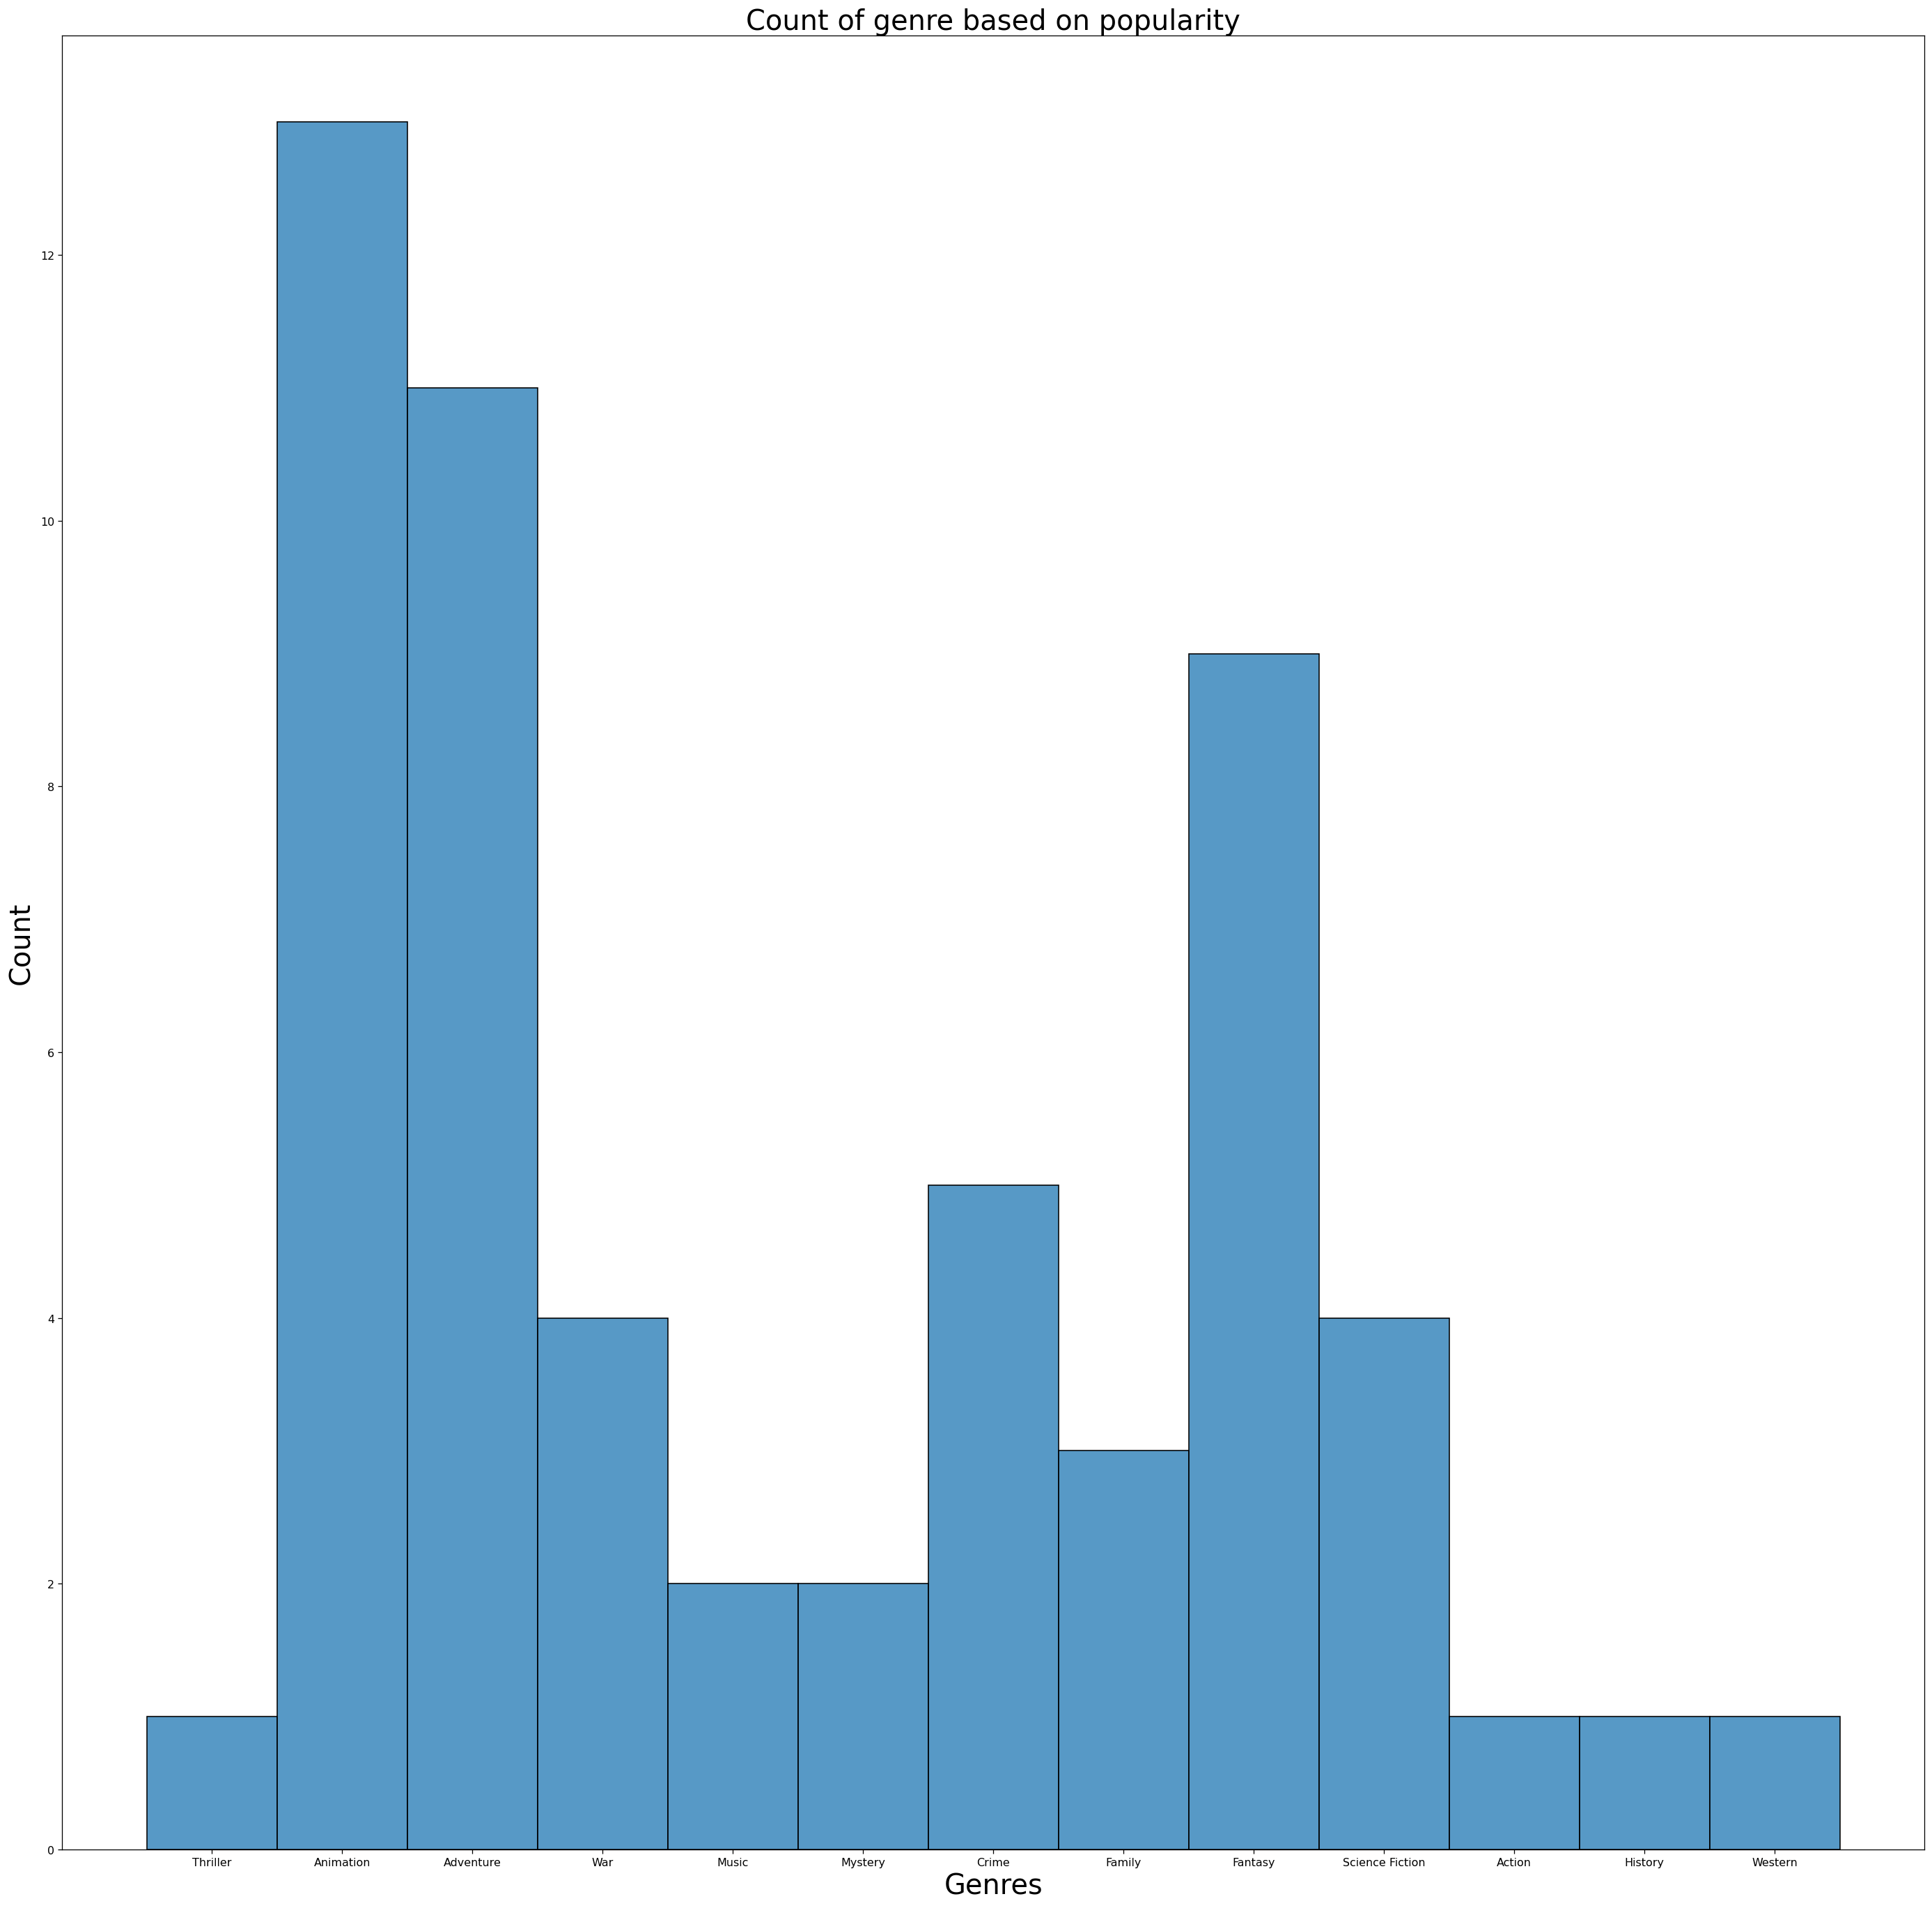

In [36]:
plt.figure(figsize=(30,30), dpi = 115)
plt.title('Count of genre based on popularity',size=25)
plt.xlabel('Genres', fontsize=25)
plt.ylabel('Count', fontsize=25)
sns.histplot(df_most_pop['genres'])
plt.show()

<a id='conclusions'></a>
## Conclusions

> In this Investigation we are able to find the average budget and revenue for each year. 
> The movie with the highest budget is **Warrior game** and the budget was **425000000** in the year **2010**.
> It was not so popular since its popularity count was **0.250540**, it also had a low vote count of **74**.
> Therefore movies with higher budget do not gain more popularity or votes.

>**Jurassic World** is the most popular movie and it also has a high vote.
>Jurrassic world has the 4th highest profit. Avatar on the other hand with the most profit has a low popularity but a high vote, it also has the highest revenue and a budget above average.
> The popularity of a movie has an impact on the vote and could also determine the profit return.

> Therefore if we want to create a movie and want to make profit, the focus should be on increasing the popularity of the
>movie.
> The Top 5 Genres we should focus on should be Drama, Comedy, Thriller, Action, Romance, Horror.
> Animation and Adventure should be considered also as they are have the highest popularity count when group per year. 
>The Top 5 cast we should focus on should be Robert De Niro, Samuel L. Jackson, Bruce Willis, Nicolas Cage, Michael Caine.

>This analysis is not error proof becase we lost some of the data in the data cleaning steps.

#### Resources Refrenced: https://stackoverflow.com/questions/35414431/how-to-define-user-defined-function-in-pandas
